# Node2Vec Script

This script is used to generate the Node2Vec results.

This script requires following datasets:

- 'DataFrame'
- 'clean_data'
- 'embeddings'
- 'embeddings_test'
- 'TEST_DF'


In [1]:
# import all required packages
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

import seaborn as sns
import statsmodels.api as sm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import sklearn.metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

## Load and pre-process the data

In [2]:
# used for scaling numerical data within the range of 1 - 5 
def normalize(x):
    return (x-x.min())/(x.max()-x.min()) * (5-1) + 1

In [3]:
df = pd.read_csv('DataFrame')
X = pd.read_csv('clean_data')

In [4]:
X.drop(columns=['Unnamed: 0'],inplace=True)
X.Class = X.Class.apply(lambda x: 1 if x == 0 else(2 if x == 1 else 3))

In [5]:
features = pd.Series(X.satisfaction) 

In [6]:
x_var = X.drop(columns=['satisfaction'])
x_wd = pd.get_dummies(data=x_var,columns=['Customer Type','Type of Travel','Gender'])
x_wd[['Age','Departure Delay in Minutes','Flight Distance']] = normalize(x_wd[['Age','Departure Delay in Minutes','Flight Distance']])

In [7]:
# node2vec train data
t = pd.read_csv('embeddings', delimiter = " ", index_col=0, header = None)
t.sort_index(inplace=True)
t = t.to_numpy()
t.shape

(6000, 2)

In [8]:
Z = pd.DataFrame(t,columns = ['x1','x2'])

In [9]:
# node2vec train
XXXX = pd.DataFrame()
XXXX = x_wd.copy(deep=True)
XXXX['z1'] = Z.x1
XXXX['z2'] = Z.x2
#XXXX['z3'] = Z.x3
#XXXX['z4'] = Z.x4
#XXXX['z5'] = Z.x5
XXXX_label = pd.get_dummies(features)
XXXX

Age  Class  Flight Distance  Inflight wifi service  \
0     4.179487      1         1.732843                      3   
1     3.461538      3         1.141340                      2   
2     3.256410      3         3.128268                      5   
3     2.025641      1         1.349673                      2   
4     1.256410      1         1.322712                      2   
...        ...    ...              ...                    ...   
5995  3.153846      1         2.241830                      3   
5996  2.333333      1         1.425654                      2   
5997  3.205128      1         2.871732                      1   
5998  2.435897      1         1.494281                      2   
5999  2.282051      3         1.269608                      3   

      Departure/Arrival time convenient  Ease of Online booking  \
0                                     2                       3   
1                                     5                       5   
2                                     5                       5   
3                                     3                       2   
4                                     4                       2   
...                                 ...                     ...   
5995                                  4                       3   
5996                                  5                       2   
5997                                  4                       1   
5998                                  3                       2   
5999                                  4                       3   

      Gate location  Food and drink  Online boarding  Seat comfort  ...  \
0                 3               4                3             2  ...   
1                 5               2                2             2  ...   
2                 5               3                5             1  ...   
3                 2               3                2             3  ...   
4                 3               2                2             2  ...   
...             ...             ...              ...           ...  ...   
5995              4               5                4             5  ...   
5996              3               5                2             5  ...   
5997              5               1                4             4  ...   
5998              2               5                2             5  ...   
5999              1               4                3             4  ...   

      Cleanliness  Departure Delay in Minutes  Customer Type_0  \
0               3                    1.000000                1   
1               2                    2.095798                1   
2               3                    1.000000                1   
3               3                    1.000000                0   
4               2                    1.000000                1   
...           ...                         ...              ...   
5995            5                    1.235294                1   
5996            5                    1.000000                1   
5997            4                    1.000000                1   
5998            5                    1.000000                1   
5999            4                    1.073950                1   

      Customer Type_1  Type of Travel_0  Type of Travel_1  Gender_0  Gender_1  \
0                   0                 1                 0         0         1   
1                   0                 0                 1         1         0   
2                   0                 0                 1         0         1   
3                   1                 0                 1         1         0   
4                   0                 1                 0         1         0   
...               ...               ...               ...       ...       ...   
5995                0                 1                 0         0         1   
5996                0                 1                 0         0         1   
59

In [10]:
# node2vec test
t_test = pd.read_csv('embeddings_test', delimiter = " ", index_col=0, header = None)
t_test.sort_index(inplace=True)
t_test = t_test.to_numpy()
t_test.shape

(6000, 2)

In [11]:
Z_test = pd.DataFrame(t_test,columns = ['x1','x2'])

## Load and pre-process test data

In [12]:
n2v_test_df = pd.read_csv('TEST_DF')
n2v_test_df.drop(columns=['Unnamed: 0'],inplace=True)
n2v_test_label = n2v_test_df.satisfaction
n2v_test_feats = n2v_test_df.drop(columns=['satisfaction'])
n2v_test_feats_dummy = pd.get_dummies(data=n2v_test_feats,columns=['Customer Type','Type of Travel','Gender'])
n2v_test_feats_dummy[['Age','Departure Delay in Minutes','Flight Distance']] = normalize(n2v_test_feats_dummy[['Age','Departure Delay in Minutes','Flight Distance']])

In [13]:
TTTTTT_label = pd.get_dummies(n2v_test_label)
TTTTTT_label_tf = tf.convert_to_tensor(TTTTTT_label)
TTTTTT = pd.DataFrame()
TTTTTT = n2v_test_feats_dummy.copy(deep=True)
TTTTTT['z1'] = Z_test.x1
TTTTTT['z2'] = Z_test.x2
TTTTTT_tf = tf.convert_to_tensor(TTTTTT)
TTTTTT

Age  Class  Flight Distance  Inflight wifi service  \
0     1.256410      1         2.090417                      1   
1     4.025641      1         1.000000                      1   
2     1.820513      1         1.163247                      3   
3     3.102564      1         1.322886                      5   
4     3.564103      3         1.072153                      3   
...        ...    ...              ...                    ...   
5995  3.256410      3         2.948140                      2   
5996  3.153846      1         1.859526                      2   
5997  2.333333      3         2.491770                      3   
5998  2.025641      1         1.072153                      2   
5999  2.692308      3         1.469899                      2   

      Departure/Arrival time convenient  Ease of Online booking  \
0                                     2                       1   
1                                     5                       1   
2                                     0                       3   
3                                     4                       4   
4                                     5                       3   
...                                 ...                     ...   
5995                                  4                       4   
5996                                  0                       2   
5997                                  5                       3   
5998                                  4                       2   
5999                                  2                       2   

      Gate location  Food and drink  Online boarding  Seat comfort  ...  \
0                 3               1                1             1  ...   
1                 3               2                5             4  ...   
2                 3               3                3             4  ...   
3                 4               5                5             5  ...   
4                 5               4                5             4  ...   
...             ...             ...              ...           ...  ...   
5995              4               3                2             3  ...   
5996              2               3                3             2  ...   
5997              2               3                3             3  ...   
5998              3               3                2             1  ...   
5999              4               5                2             5  ...   

      Cleanliness  Departure Delay in Minutes  Customer Type_0  \
0               1                    1.000000                1   
1               3                    1.000000                1   
2               3                    1.197687                0   
3               5                    1.000000                1   
4               1                    1.058885                1   
...           ...                         ...              ...   
5995            3                    1.000000                1   
5996            1                    1.000000                1   
5997            3                    1.765510                1   
5998            3                    1.000000                1   
5999            5                    1.000000                0   

      Customer Type_1  Type of Travel_0  Type of Travel_1  Gender_0  Gender_1  \
0                   0                 1                 0         0         1   
1                   0                 1                 0         0         1   
2                   1                 0                 1         0         1   
3                   0                 0                 1         1         0   
4                   0                 1                 0         1         0   
...               ...               ...               ...       ...       ...   
5995                0                 0                 1         0         1   
5996                0                 1                 0         0         1   
59

## ANN Results Node2Vec

In [14]:
x_train, x_test, y_train, y_test = train_test_split(XXXX,XXXX_label, test_size = 0.2, shuffle=True)

In [15]:
x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=200, batch_size=10)

Epoch 1/200
480/480 [==============================] - 3s 5ms/step - loss: 0.8250 - accuracy: 0.6194 - val_loss: 0.4839 - val_accuracy: 0.7817
Epoch 2/200
480/480 [==============================] - 1s 2ms/step - loss: 0.4452 - accuracy: 0.8212 - val_loss: 0.3963 - val_accuracy: 0.8383
Epoch 3/200
480/480 [==============================] - 1s 2ms/step - loss: 0.3940 - accuracy: 0.8475 - val_loss: 0.3529 - val_accuracy: 0.8583
Epoch 4/200
480/480 [==============================] - 1s 2ms/step - loss: 0.3589 - accuracy: 0.8539 - val_loss: 0.3315 - val_accuracy: 0.8683
Epoch 5/200
480/480 [==============================] - 1s 2ms/step - loss: 0.3305 - accuracy: 0.8771 - val_loss: 0.3144 - val_accuracy: 0.8742
Epoch 6/200
480/480 [==============================] - 1s 2ms/step - loss: 0.3079 - accuracy: 0.8839 - val_loss: 0.2931 - val_accuracy: 0.8875
Epoch 7/200
480/480 [==============================] - 1s 2ms/step - loss: 0.2876 - accuracy: 0.8798 - val_loss: 0.2767 - val_accuracy: 0.8958

Epoch 58/200
480/480 [==============================] - 1s 2ms/step - loss: 0.1527 - accuracy: 0.9374 - val_loss: 0.1451 - val_accuracy: 0.9467
Epoch 59/200
480/480 [==============================] - 1s 2ms/step - loss: 0.1333 - accuracy: 0.9470 - val_loss: 0.1437 - val_accuracy: 0.9475
Epoch 60/200
480/480 [==============================] - 2s 4ms/step - loss: 0.1366 - accuracy: 0.9425 - val_loss: 0.1459 - val_accuracy: 0.9467
Epoch 61/200
480/480 [==============================] - 3s 5ms/step - loss: 0.1410 - accuracy: 0.9395 - val_loss: 0.1362 - val_accuracy: 0.9533
Epoch 62/200
480/480 [==============================] - 2s 4ms/step - loss: 0.1426 - accuracy: 0.9458 - val_loss: 0.1336 - val_accuracy: 0.9600
Epoch 63/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1435 - accuracy: 0.9422 - val_loss: 0.1652 - val_accuracy: 0.9358
Epoch 64/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1362 - accuracy: 0.9519 - val_loss: 0.1345 - val_accuracy:

Epoch 115/200
480/480 [==============================] - 1s 2ms/step - loss: 0.1316 - accuracy: 0.9467 - val_loss: 0.1290 - val_accuracy: 0.9567
Epoch 116/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1290 - accuracy: 0.9502 - val_loss: 0.1275 - val_accuracy: 0.9567
Epoch 117/200
480/480 [==============================] - 1s 2ms/step - loss: 0.1203 - accuracy: 0.9549 - val_loss: 0.1273 - val_accuracy: 0.9600
Epoch 118/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1266 - accuracy: 0.9557 - val_loss: 0.1352 - val_accuracy: 0.9567
Epoch 119/200
480/480 [==============================] - 2s 5ms/step - loss: 0.1361 - accuracy: 0.9459 - val_loss: 0.1257 - val_accuracy: 0.9583
Epoch 120/200
480/480 [==============================] - 3s 5ms/step - loss: 0.1288 - accuracy: 0.9498 - val_loss: 0.1398 - val_accuracy: 0.9525
Epoch 121/200
480/480 [==============================] - 3s 6ms/step - loss: 0.1261 - accuracy: 0.9539 - val_loss: 0.1245 - val_ac

480/480 [==============================] - 1s 2ms/step - loss: 0.1178 - accuracy: 0.9548 - val_loss: 0.1222 - val_accuracy: 0.9592
Epoch 172/200
480/480 [==============================] - 1s 2ms/step - loss: 0.1184 - accuracy: 0.9542 - val_loss: 0.1189 - val_accuracy: 0.9592
Epoch 173/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1103 - accuracy: 0.9611 - val_loss: 0.1380 - val_accuracy: 0.9517
Epoch 174/200
480/480 [==============================] - 1s 2ms/step - loss: 0.1217 - accuracy: 0.9517 - val_loss: 0.1439 - val_accuracy: 0.9433
Epoch 175/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1273 - accuracy: 0.9528 - val_loss: 0.1214 - val_accuracy: 0.9608
Epoch 176/200
480/480 [==============================] - 1s 2ms/step - loss: 0.1145 - accuracy: 0.9551 - val_loss: 0.1177 - val_accuracy: 0.9592
Epoch 177/200
480/480 [==============================] - 1s 2ms/step - loss: 0.1142 - accuracy: 0.9554 - val_loss: 0.1222 - val_accuracy: 0.9567

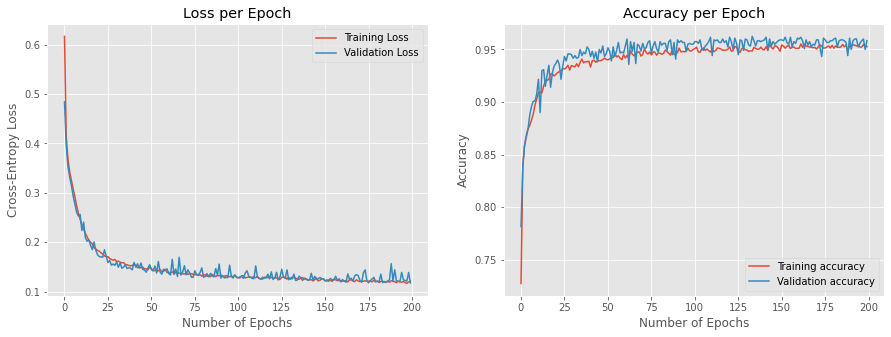

In [16]:
plt.subplots(figsize=(15,5))

plt.subplot(121)
plt.plot(history.history['loss'],label = 'Training Loss')
plt.plot(history.history['val_loss'],label = 'Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Loss per Epoch')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'],label = 'Training accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()

plt.show()

In [17]:
results = model.evaluate(TTTTTT_tf, TTTTTT_label_tf)
print("test loss, test acc:", results)

188/188 [==============================] - 1s 2ms/step - loss: 0.4972 - accuracy: 0.8437
test loss, test acc: [0.49716535210609436, 0.843666672706604]


## SVM Results Node2Vec

In [18]:
svm_y = np.empty((len(features),1))

for i in range(len(features)):
    if features.iloc[i] == 1:
        svm_y[i] = 1
    else:
        svm_y[i] = -1

svm_y.astype(int)
x_train, x_test, y_train, y_test = train_test_split(XXXX,svm_y, test_size = 0.2, shuffle=True)

In [19]:
svm_y_test = np.empty((len(n2v_test_label),1))

for i in range(len(n2v_test_label)):
    if n2v_test_label.iloc[i] == 1:
        svm_y_test[i] = 1
    else:
        svm_y_test[i] = -1

In [20]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.939375
0.935


In [21]:
y_pred = clf.predict(TTTTTT)
print(clf.score(TTTTTT, svm_y_test))
print(sklearn.metrics.f1_score(y_pred, svm_y_test,average='micro'))

0.839
0.839


## Random Forest Results Node2Vec

In [22]:
clf = RandomForestClassifier(max_depth=None, random_state=0)

clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

<ipython-input-22-dabfb3d76502>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


1.0
0.9558333333333333


In [23]:
y_pred = clf.predict(TTTTTT)
print(clf.score(TTTTTT, svm_y_test))
print(sklearn.metrics.f1_score(y_pred, svm_y_test))

0.9356666666666666
0.9244913928012519


## AdaBoost Results Node2Vec

In [24]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
#y_pred = clf.predict(TTTTTT)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))
#print(clf.score(TTTTTT, svm_y_test))
#print(sklearn.metrics.f1_score(y_pred, svm_y_test))

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.93375
0.9258333333333333


## Naive Bayes Results Node2Vec

In [25]:
clf = GaussianNB()
clf.fit(x_train, y_train)
#y_pred = clf.predict(TTTTTT)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))
#print(clf.score(TTTTTT, svm_y_test))
#print(sklearn.metrics.f1_score(y_pred, svm_y_test))

0.864375
0.85


/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## QDA Results Node2Vec

In [26]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

clf = QDA()
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))
#print(clf.score(TTTTTT, svm_y_test))

0.8329166666666666
0.8216666666666667


/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## Logistic Regression Results Node2Vec

In [27]:
x_train, x_test, y_train, y_test = train_test_split(XXXX,features, test_size = 0.2, shuffle=True)
clf = LogisticRegression(random_state=0,max_iter=500).fit(x_train, y_train)
#y_pred = clf.predict(TTTTTT)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))
#print(clf.score(TTTTTT, n2v_test_label))

0.8758333333333334
0.8966666666666666


### Statsmodels Output

In [28]:
P = sm.add_constant(t) 
log_reg = sm.Logit(features, P).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.517356
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5997
Method:                           MLE   Df Model:                            2
Date:                Wed, 14 Jul 2021   Pseudo R-squ.:                  0.2427
Time:                        17:29:04   Log-Likelihood:                -3104.1
converged:                       True   LL-Null:                       -4099.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7051      0.366    -10.135      0.000      -4.422      -2.989
x1             0.9593      0.

In [29]:
predictions = log_reg.predict(P) 

yhat_log = np.empty((len(predictions),1))

for i in range(len(predictions)):
    if predictions[i] < 0.5:
        yhat_log[i] = 0
    else:         
        yhat_log[i] = 1

print('Classification Accuracy validation set {}'.format(accuracy_score(features,yhat_log)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(features,yhat_log))

Classification Accuracy validation set 0.7668333333333334
-------------------------------------------------------------
Confusion Matrix validation set:
[[2612  811]
 [ 588 1989]]


## Scatterplots

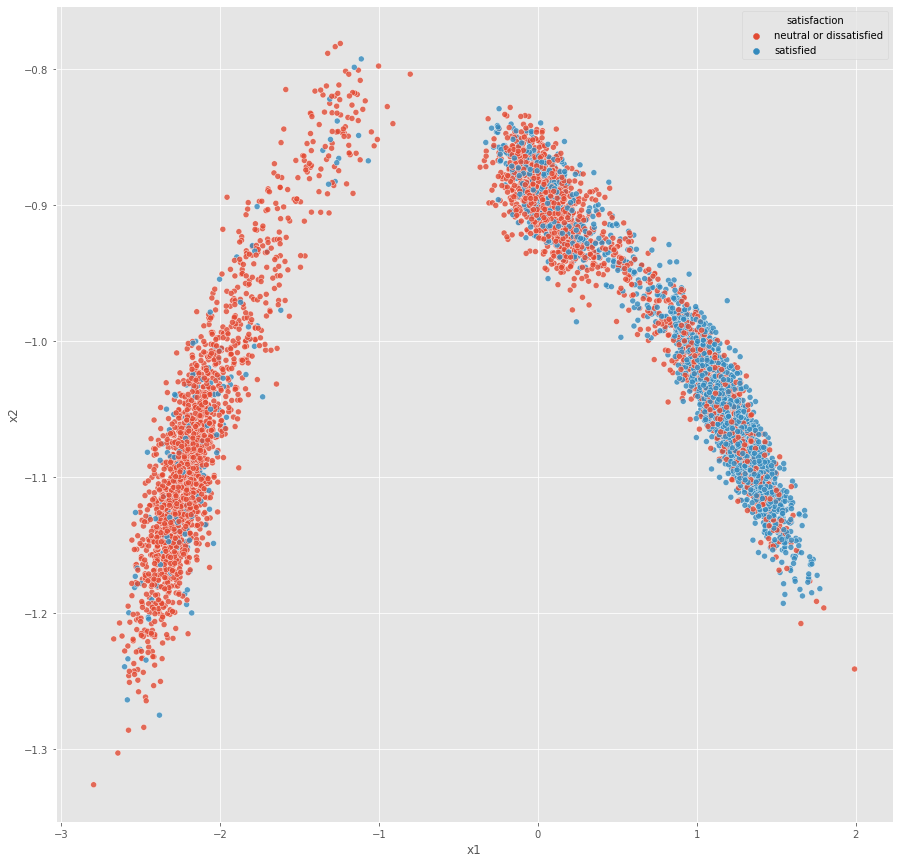

In [30]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=Z.x1,y=Z.x2,hue=df['satisfaction'],alpha=0.8)
plt.show()

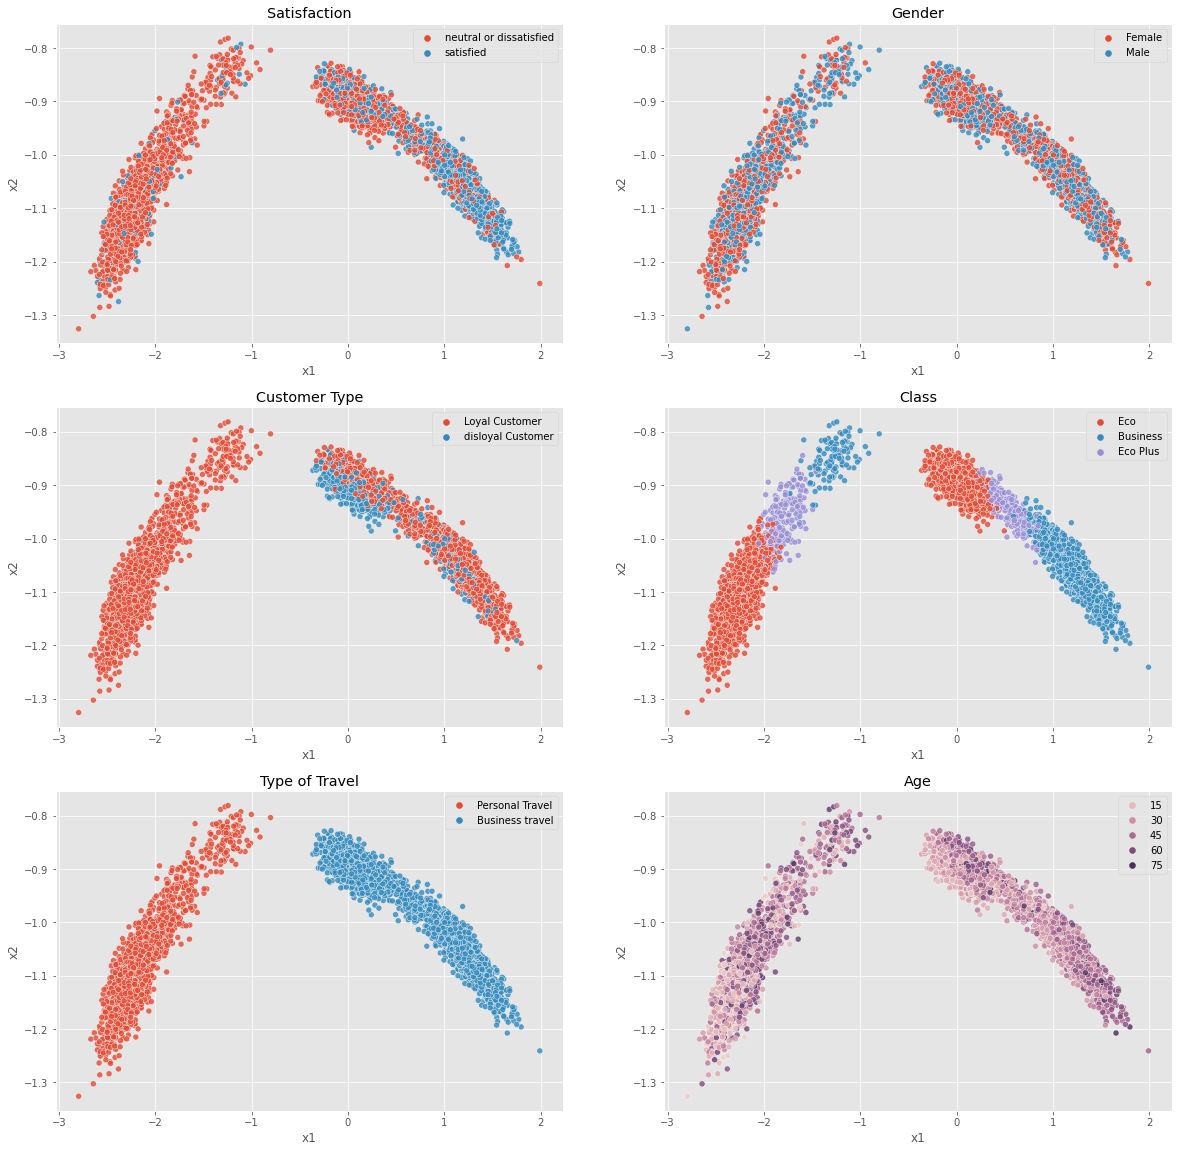

In [31]:
fig = plt.subplots(figsize=(20,20))

plt.subplot(321)
sns.scatterplot(x=Z.x1,y=Z.x2,hue=df['satisfaction'],alpha=0.8)
plt.title('Satisfaction')
plt.legend()

plt.subplot(322)
sns.scatterplot(x=Z.x1,y=Z.x2,hue=df['Gender'],alpha=0.8)
plt.title('Gender')
plt.legend()

plt.subplot(323)
sns.scatterplot(x=Z.x1,y=Z.x2,hue=df['Customer Type'],alpha=0.8)
plt.title('Customer Type')
plt.legend()

plt.subplot(324)
sns.scatterplot(x=Z.x1,y=Z.x2,hue=df['Class'],alpha=0.8)
plt.title('Class')
plt.legend()

plt.subplot(325)
sns.scatterplot(x=Z.x1,y=Z.x2,hue=df['Type of Travel'],alpha=0.8)
plt.title('Type of Travel')
plt.legend()

plt.subplot(326)
sns.scatterplot(x=Z.x1,y=Z.x2,hue=df['Age'],alpha=0.8)
plt.title('Age')
plt.legend()

plt.show()
